## Introduction

In this notebook, we will merge two image datasets, which will later be used to perform a binary classification of malignant or benign skin lesions.


## Datasets

### Fitzpatrick17k Dataset

Data source link:
https://github.com/mattgroh/fitzpatrick17k/blob/main/README.md

Data description: 

This is a csv file containing metadata on each photo and urls to the original source of the photo.

It consists of a dermatoscopic images from different populations. The final dataset consists of 16677 dermatoscopic images which can serve as a training set for academic machine learning purposes. 

The Fitzpatrick skin type (phototype) is a classification system developed in 1975 by Thomas B. Fitzpatrick. The Fitzpatrick skin phototype helps people and their dermatologists to determine their skin type and plan for their skincare needs by determining how skin responds to sunlight. Specifically, the Fitzpatrick skin types are determined by the amount of melanin, or pigment, found in a person’s skin cells.



We hope this classifier and pairing it with the classification of skin diseases will reduce the possibility of hidden biases for the diagnoses. 

### DDI Dataset (Diverse Dermatology Images)

A biopsy-proven skin disease dataset with diverse skin tone representation.

Data source link:
https://ddi-dataset.github.io/

Data descritpion:
The images included in the DDI dataset were retrospectively selected from reviewing pathology reports in Stanford Clinics from 2010-2020 with further details in our paper. There are 656 images representing 570 unique patients. Each image label was expertly curated: skin tone was labeled based on in-person evaluation at the clinic visit cross-referenced against demographic photos and review of the clinical images by two board certified dermatologists. Each diagnosis was based on pathology reports from biopsy: these reports and the corresponding image was reviewed by a board certified dermatologist and dermatopathologist.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Fitzpatrick17k

In [2]:
df_fitz = pd.read_csv('fitzpatrick17k.csv')
df_fitz.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...


In [3]:
df_fitz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16577 entries, 0 to 16576
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   md5hash                16577 non-null  object
 1   fitzpatrick_scale      16577 non-null  int64 
 2   fitzpatrick_centaur    16577 non-null  int64 
 3   label                  16577 non-null  object
 4   nine_partition_label   16577 non-null  object
 5   three_partition_label  16577 non-null  object
 6   qc                     504 non-null    object
 7   url                    16536 non-null  object
 8   url_alphanum           16577 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [4]:
df_fitz.isnull().sum()

md5hash                      0
fitzpatrick_scale            0
fitzpatrick_centaur          0
label                        0
nine_partition_label         0
three_partition_label        0
qc                       16073
url                         41
url_alphanum                 0
dtype: int64

In [5]:
print("types of diagnostic: " + str(df_fitz['qc'].unique()[:10]))

types of diagnostic: [nan '1 Diagnostic' '5 Potentially' '3 Wrongly labelled'
 '2 Characteristic' '4 Other']


In [6]:
print("types of disease: " + str(df_fitz['label'].unique()[:100]))

types of disease: ['drug induced pigmentary changes' 'photodermatoses' 'dermatofibroma'
 'psoriasis' 'kaposi sarcoma' 'neutrophilic dermatoses'
 'granuloma annulare' 'nematode infection' 'allergic contact dermatitis'
 'necrobiosis lipoidica' 'hidradenitis' 'melanoma' 'acne vulgaris'
 'sarcoidosis' 'xeroderma pigmentosum' 'actinic keratosis' 'scleroderma'
 'syringoma' 'folliculitis' 'pityriasis lichenoides chronica' 'porphyria'
 'dyshidrotic eczema' 'seborrheic dermatitis' 'prurigo nodularis' 'acne'
 'neurofibromatosis' 'eczema' 'pediculosis lids' 'basal cell carcinoma'
 'pityriasis rubra pilaris' 'pityriasis rosea' 'livedo reticularis'
 'stevens johnson syndrome' 'erythema multiforme'
 'acrodermatitis enteropathica' 'epidermolysis bullosa' 'dermatomyositis'
 'urticaria' 'basal cell carcinoma morpheiform' 'vitiligo'
 'erythema nodosum' 'lupus erythematosus' 'lichen planus'
 'sun damaged skin' 'drug eruption' 'scabies' 'cheilitis'
 'urticaria pigmentosa' 'behcets disease' 'nevocytic nevu

## DDI

In [7]:
df_ddi = pd.read_csv('ddi_metadata.csv')
df_ddi.head()

,Unnamed: 0,DDI_ID,DDI_file,skin_tone,malignant,disease
0,0,1,000001.png,56,True,melanoma-in-situ
1,1,2,000002.png,56,True,melanoma-in-situ
2,2,3,000003.png,56,True,mycosis-fungoides
3,3,4,000004.png,56,True,squamous-cell-carcinoma-in-situ
4,4,5,000005.png,12,True,basal-cell-carcinoma


In [8]:
df_ddi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  656 non-null    int64 
 1   DDI_ID      656 non-null    int64 
 2   DDI_file    656 non-null    object
 3   skin_tone   656 non-null    int64 
 4   malignant   656 non-null    bool  
 5   disease     656 non-null    object
dtypes: bool(1), int64(3), object(2)
memory usage: 26.4+ KB


In [9]:
df_ddi.isnull().sum()

Unnamed: 0    0
DDI_ID        0
DDI_file      0
skin_tone     0
malignant     0
disease       0
dtype: int64

In [10]:
print("types of disease: " + str(df_ddi['disease'].unique()[:100]))

types of disease: ['melanoma-in-situ' 'mycosis-fungoides' 'squamous-cell-carcinoma-in-situ'
 'basal-cell-carcinoma' 'squamous-cell-carcinoma'
 'melanoma-acral-lentiginous' 'basal-cell-carcinoma-superficial'
 'squamous-cell-carcinoma-keratoacanthoma' 'subcutaneous-t-cell-lymphoma'
 'melanocytic-nevi' 'seborrheic-keratosis-irritated'
 'focal-acral-hyperkeratosis' 'hyperpigmentation' 'lipoma'
 'foreign-body-granuloma' 'blue-nevus' 'verruca-vulgaris' 'acrochordon'
 'wart' 'abrasions-ulcerations-and-physical-injuries'
 'basal-cell-carcinoma-nodular' 'epidermal-cyst'
 'acquired-digital-fibrokeratoma' 'epidermal-nevus' 'seborrheic-keratosis'
 'trichilemmoma' 'pyogenic-granuloma' 'neurofibroma'
 'syringocystadenoma-papilliferum' 'nevus-lipomatosus-superficialis'
 'benign-keratosis' 'inverted-follicular-keratosis' 'onychomycosis'
 'dermatofibroma' 'trichofolliculoma' 'lymphocytic-infiltrations'
 'prurigo-nodularis' 'kaposi-sarcoma' 'scar' 'eccrine-poroma'
 'angioleiomyoma' 'keloid' 'hematoma' '

## Metadata Comparison 

### Image Filename 
- DDI: "DDI_file"
- Fitzpartrick17k: "md5hash" (minus the jpg extension)

We can merge these columns by adding the extension to the fitzpatrick data and rename the column to filename.



In [11]:
print("DDI")
print("count labels: " + str(df_ddi['DDI_file'].count()))
print("example labels: " + str(df_ddi['DDI_file'].unique()[:10]))

DDI
count labels: 656
example labels: ['000001.png' '000002.png' '000003.png' '000004.png' '000005.png'
 '000006.png' '000007.png' '000008.png' '000009.png' '000010.png']


In [12]:
print("Fitzpatrick")
print("count labels: " + str(df_fitz['md5hash'].count()))
print("example labels: " + str(df_fitz['md5hash'].unique()[:10]))

Fitzpatrick
count labels: 16577
example labels: ['5e82a45bc5d78bd24ae9202d194423f8' 'fa2911a9b13b6f8af79cb700937cc14f'
 'd2bac3c9e4499032ca8e9b07c7d3bc40' '0a94359e7eaacd7178e06b2823777789'
 'a39ec3b1f22c08a421fa20535e037bba' '45f7fe0e10214e32e890cad9d29d4811'
 '6c395be9325dbb10e55497304b398253' '9dc73230c77ab5c58dc1f11caef39ea2'
 'f23937e86de55c3471ac5d0143b67e08' '09d46db9589ff45436cda87c4abc946b']


### Skin Tone
- DDI: "skin_tone", the labels are the between "12", "34" & "56". The dataset comprised a retrospective convenience sample across all images of Fitzpatrick I-VI but was also designed to allow direct comparison between Fitzpatrick I-II and Fitzpatrick V-VI by matching diagnostic category, age within 10 years, gender, and date of photograph within 3 years. 


- Fitzpartrick17k: "fitzpatrick_scale" There are six Fitzpatrick skin types as outlined below:
Type 1 – Typically very light skin, hair, and eyes. Skin always burns and often freckles after sun exposure and does not tan.
Type 2 – Light skin tone, eyes, and hair. Often burns and may freckle or lightly tan.
Type 3 – Slightly darker, golden skin tone. May have darker hair or eye color. Skin might burn, freckle, or tan, depending on the extent of sun exposure.
Type 4 – Light brown or olive skin, darker hair and eye color. Skin may burn, doesn’t typically freckle, and tans readily.
Type 5 – Brown skin with dark brown or black hair and eyes. Skin isn’t likely to burn or freckle and tans darkly.
Type 6 – Darker pigmented brown and black skin with hair and eyes that are also very dark brown or black. Skin is unlikely to burn or freckle and tans darkly.

We will merge these columns first by combining the type labels of the fitzpatrick set as DDI does, labeling types 1 & 2 as "12", 3 & 4 as "34" and 5 & 6 as "56". 

In [13]:
print("DDI")
print("count labels: " + str(df_ddi['skin_tone'].count()))
print("example labels: " + str(df_ddi['skin_tone'].unique()))

DDI
count labels: 656
example labels: [56 12 34]


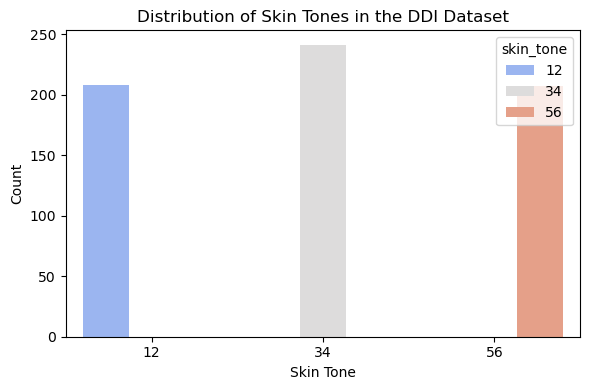

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='skin_tone', data=df_ddi, hue='skin_tone', ax=ax, palette='coolwarm')

# Set the title and labels
ax.set_title('Distribution of Skin Tones in the DDI Dataset')
ax.set_xlabel('Skin Tone')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
print("Fitzpatrick")
print("count labels: " + str(df_fitz['fitzpatrick_scale'].count()))
print("example labels: " + str(df_fitz['fitzpatrick_scale'].unique()[:10]))

Fitzpatrick
count labels: 16577
example labels: [ 3  1  2  6  4 -1  5]


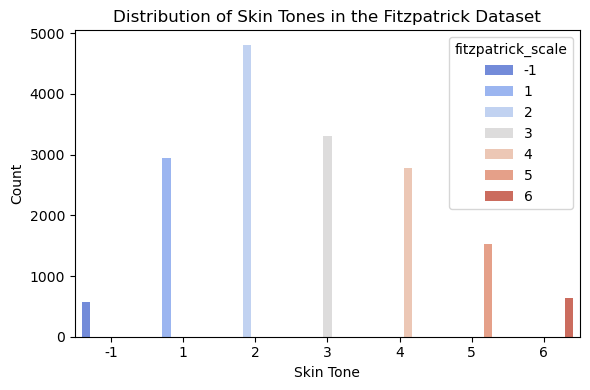

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='fitzpatrick_scale', data=df_fitz, hue='fitzpatrick_scale', ax=ax, palette='coolwarm')

# Set the title and labels
ax.set_title('Distribution of Skin Tones in the Fitzpatrick Dataset')
ax.set_xlabel('Skin Tone')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Diagnoses Label - Malignant / Benign

- DDI: "malignant", the labels are either "True" or "False"


- Fitzpartrick17k: "three_partition_label" the labels are either "benign", "melignant" or "non neo-plastic" (A non-cancerous, non-malignant, or benign disease or lesion) 

We will merge these columns first by combining changing each corresponding "benign" and "non neo-plastic" label in fitzpatrick to False, and "malignant" to True. The column name shall be Maligant.

In [17]:
print("DDI")
print("count labels: " + str(df_ddi['malignant'].count()))
print("example labels: " + str(df_ddi['malignant'].unique()))

DDI
count labels: 656
example labels: [ True False]


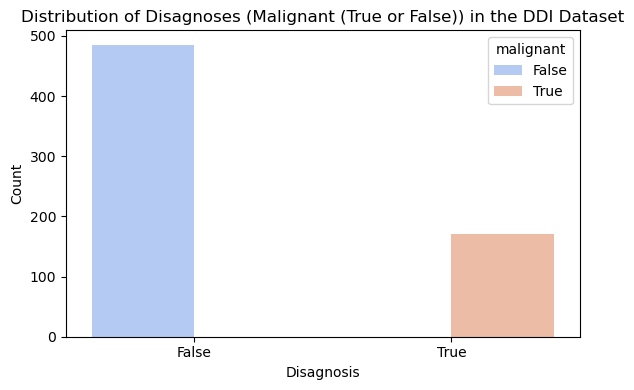

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='malignant', data=df_ddi, hue='malignant', ax=ax, palette='coolwarm')

# Set the title and labels
ax.set_title('Distribution of Disagnoses (Malignant (True or False)) in the DDI Dataset')
ax.set_xlabel('Disagnosis')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
print("Fitzpatrick")
print("count labels: " + str(df_fitz['three_partition_label'].count()))
print("example labels: " + str(df_fitz['three_partition_label'].unique()[:10]))

Fitzpatrick
count labels: 16577
example labels: ['non-neoplastic' 'benign' 'malignant']


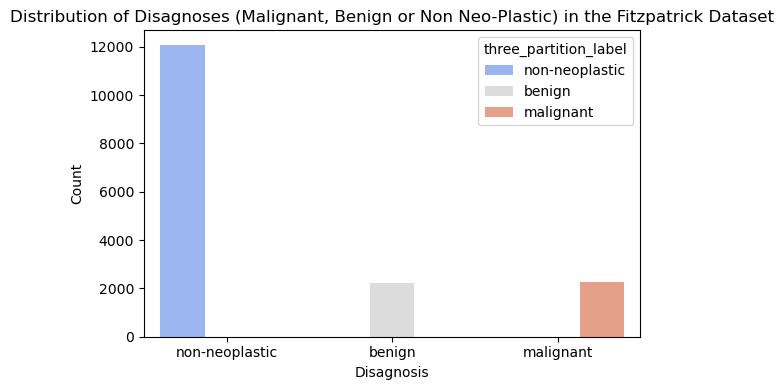

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='three_partition_label', data=df_fitz, hue='three_partition_label', ax=ax, palette='coolwarm')

# Set the title and labels
ax.set_title('Distribution of Disagnoses (Malignant, Benign or Non Neo-Plastic) in the Fitzpatrick Dataset')
ax.set_xlabel('Disagnosis')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Data retrieval process

- DDI: we understand from the documented description at the source that all of this data is biopsy proven. 
- Fitzpatrick: the data retrieval is split into the following:

'nan' 

'1 Diagnostic' 

'5 Potentially'

'3 Wrongly labelled'

'2 Characteristic' 

'4 Other'

We understand that the label "Diagnostic" is the only data which is deemed credible and should be used for model training and testing.


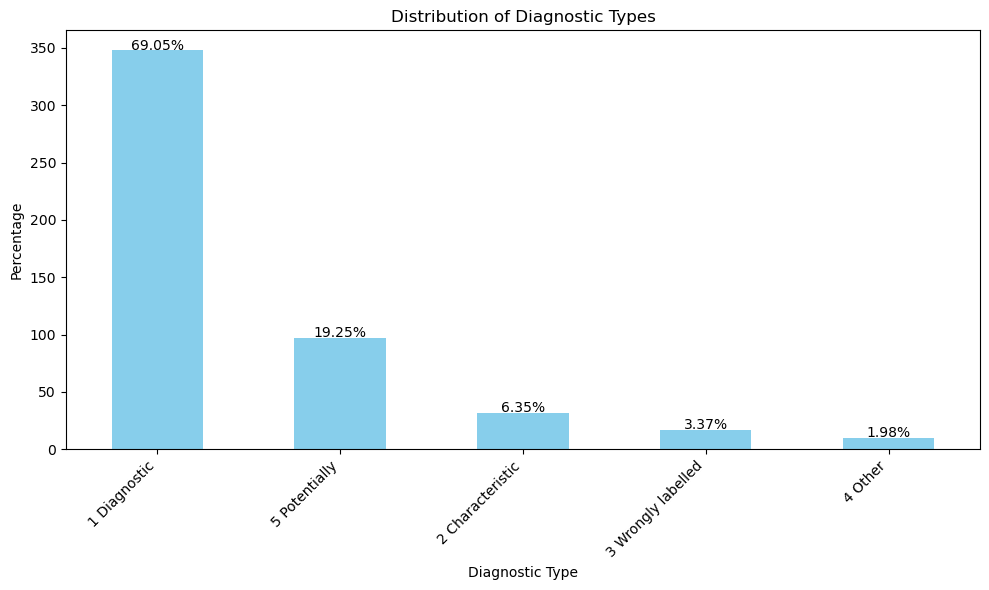

In [21]:
diagnostic_counts = df_fitz['qc'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
diagnostic_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Diagnostic Types')
plt.xlabel('Diagnostic Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Calculate percentage and display on the bars
total = len(df_fitz['qc'].dropna())  # Total non-NaN values in the 'qc' column
for i, value in enumerate(diagnostic_counts):
    plt.text(i, value + 0.5, f'{value/total*100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

In [22]:
diagnostic_counts = df_fitz['qc'].value_counts()
diagnostic_counts

1 Diagnostic          348
5 Potentially          97
2 Characteristic       32
3 Wrongly labelled     17
4 Other                10
Name: qc, dtype: int64

## Merge MetaData

In [23]:
df_merged = pd.DataFrame(index=range(17233),columns=range(5))

In [24]:
df_merged.columns = ["filename", "skin_tone", "malignant", "disease", "diagnostic_type" ]

# Function to add ".jpg" if the value does not end with ".png"
df_merged['filename'] = df_ddi['DDI_file'].tolist() + df_fitz['md5hash'].tolist()
def add_extension(value):
    if not value.endswith(".png"):
        return value + ".jpg"
    else:
        return value

# filename data
df_merged['filename'] = df_merged['filename'].apply(add_extension)

# skin tone label
df_merged['skin_tone'] = df_ddi['skin_tone'].tolist() + df_fitz['fitzpatrick_scale'].tolist()
df_merged['skin_tone'] = df_merged['skin_tone'].replace([1, 2], 12)
df_merged['skin_tone'] = df_merged['skin_tone'].replace([3, 4], 34)
df_merged['skin_tone'] = df_merged['skin_tone'].replace([5, 6], 56)

# classification skin cancer label
df_merged['malignant'] = df_ddi['malignant'].tolist() + df_fitz['three_partition_label'].tolist()
df_merged['malignant'] = df_merged['malignant'].replace(['malignant'], True)
df_merged['malignant'] = df_merged['malignant'].replace(['non-neoplastic', 'benign'], False)

# disease label
df_merged['disease'] = df_ddi['disease'].tolist() + df_fitz['label'].tolist()

# diagnostic type label
ddi_diagnostic_type_list = ['Diagnostic'] * df_ddi.shape[0]
df_merged['diagnostic_type'] = ddi_diagnostic_type_list + df_fitz['qc'].tolist()
df_merged['diagnostic_type'] = df_merged['diagnostic_type'].replace(['1 Diagnostic'], 'Diagnostic')
df_merged

,filename,skin_tone,malignant,disease,diagnostic_type
0,000001.png,56,True,melanoma-in-situ,Diagnostic
1,000002.png,56,True,melanoma-in-situ,Diagnostic
2,000003.png,56,True,mycosis-fungoides,Diagnostic
3,000004.png,56,True,squamous-cell-carcinoma-in-situ,Diagnostic
4,000005.png,12,True,basal-cell-carcinoma,Diagnostic
...,...,...,...,...,...
17228,cd90e491ddaa92f0f4eb07f73aa09f64.jpg,56,False,scleroderma,NaN
17229,5f1ed6de6a9110d7dc580a6a0312af63.jpg,34,False,pityriasis rosea,NaN
17230,f198aaf1f0550c2464b285454d34926e.jpg,34,False,myiasis,NaN
17231,6214de2e915835014235a1839cbc5938.jpg,-1,False,vitiligo,NaN


In [25]:
# Filter out rows where column value is -1
df_merged = df_merged[df_merged['skin_tone'] != -1]
df_merged = df_merged[df_merged['diagnostic_type'] == 'Diagnostic']
df_merged

,filename,skin_tone,malignant,disease,diagnostic_type
0,000001.png,56,True,melanoma-in-situ,Diagnostic
1,000002.png,56,True,melanoma-in-situ,Diagnostic
2,000003.png,56,True,mycosis-fungoides,Diagnostic
3,000004.png,56,True,squamous-cell-carcinoma-in-situ,Diagnostic
4,000005.png,12,True,basal-cell-carcinoma,Diagnostic
...,...,...,...,...,...
16987,14c1d65a2ad46d5efc6ad714224483ee.jpg,34,True,squamous cell carcinoma,Diagnostic
17020,5e14cb4533baceee678c6b667706c41c.jpg,34,False,pityriasis rubra pilaris,Diagnostic
17042,fe1b233e940594302c83ac065ba81753.jpg,34,False,urticaria pigmentosa,Diagnostic
17081,e2d0f7a666d346a7f149185b23a42483.jpg,34,True,basal cell carcinoma,Diagnostic


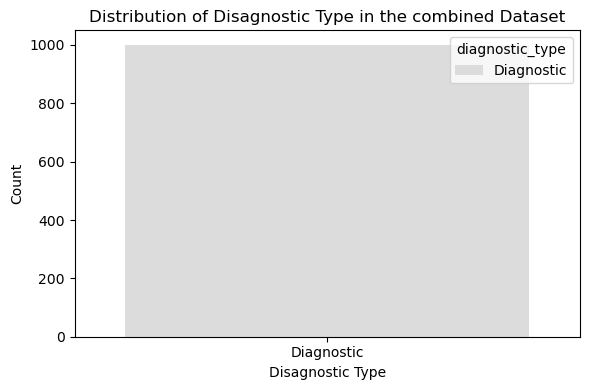

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='diagnostic_type', data=df_merged, hue='diagnostic_type', ax=ax, palette='coolwarm')

# Set the title and labels
ax.set_title('Distribution of Disagnostic Type in the combined Dataset')
ax.set_xlabel('Disagnostic Type')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

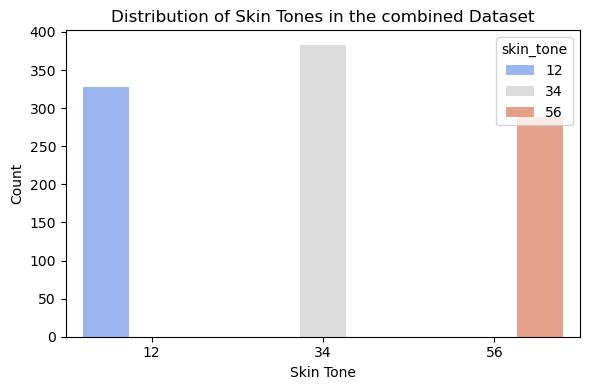

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='skin_tone', data=df_merged, hue='skin_tone', ax=ax, palette='coolwarm')

# Set the title and labels
ax.set_title('Distribution of Skin Tones in the combined Dataset')
ax.set_xlabel('Skin Tone')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

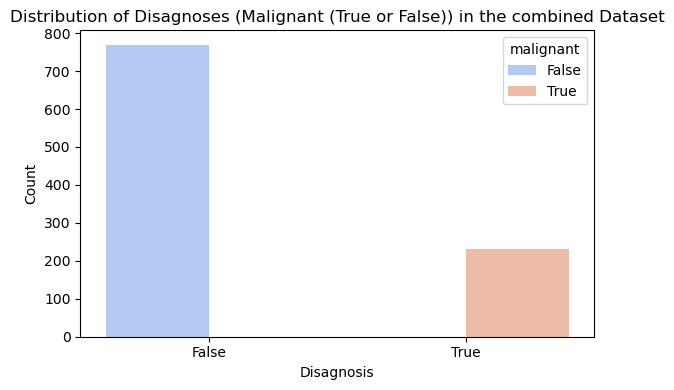

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='malignant', data=df_merged, hue='malignant', ax=ax, palette='coolwarm')

# Set the title and labels
ax.set_title('Distribution of Disagnoses (Malignant (True or False)) in the combined Dataset')
ax.set_xlabel('Disagnosis')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

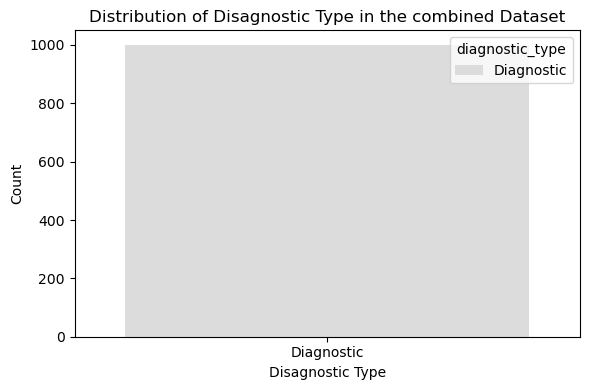

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='diagnostic_type', data=df_merged, hue='diagnostic_type', ax=ax, palette='coolwarm')

# Set the title and labels
ax.set_title('Distribution of Disagnostic Type in the combined Dataset')
ax.set_xlabel('Disagnostic Type')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

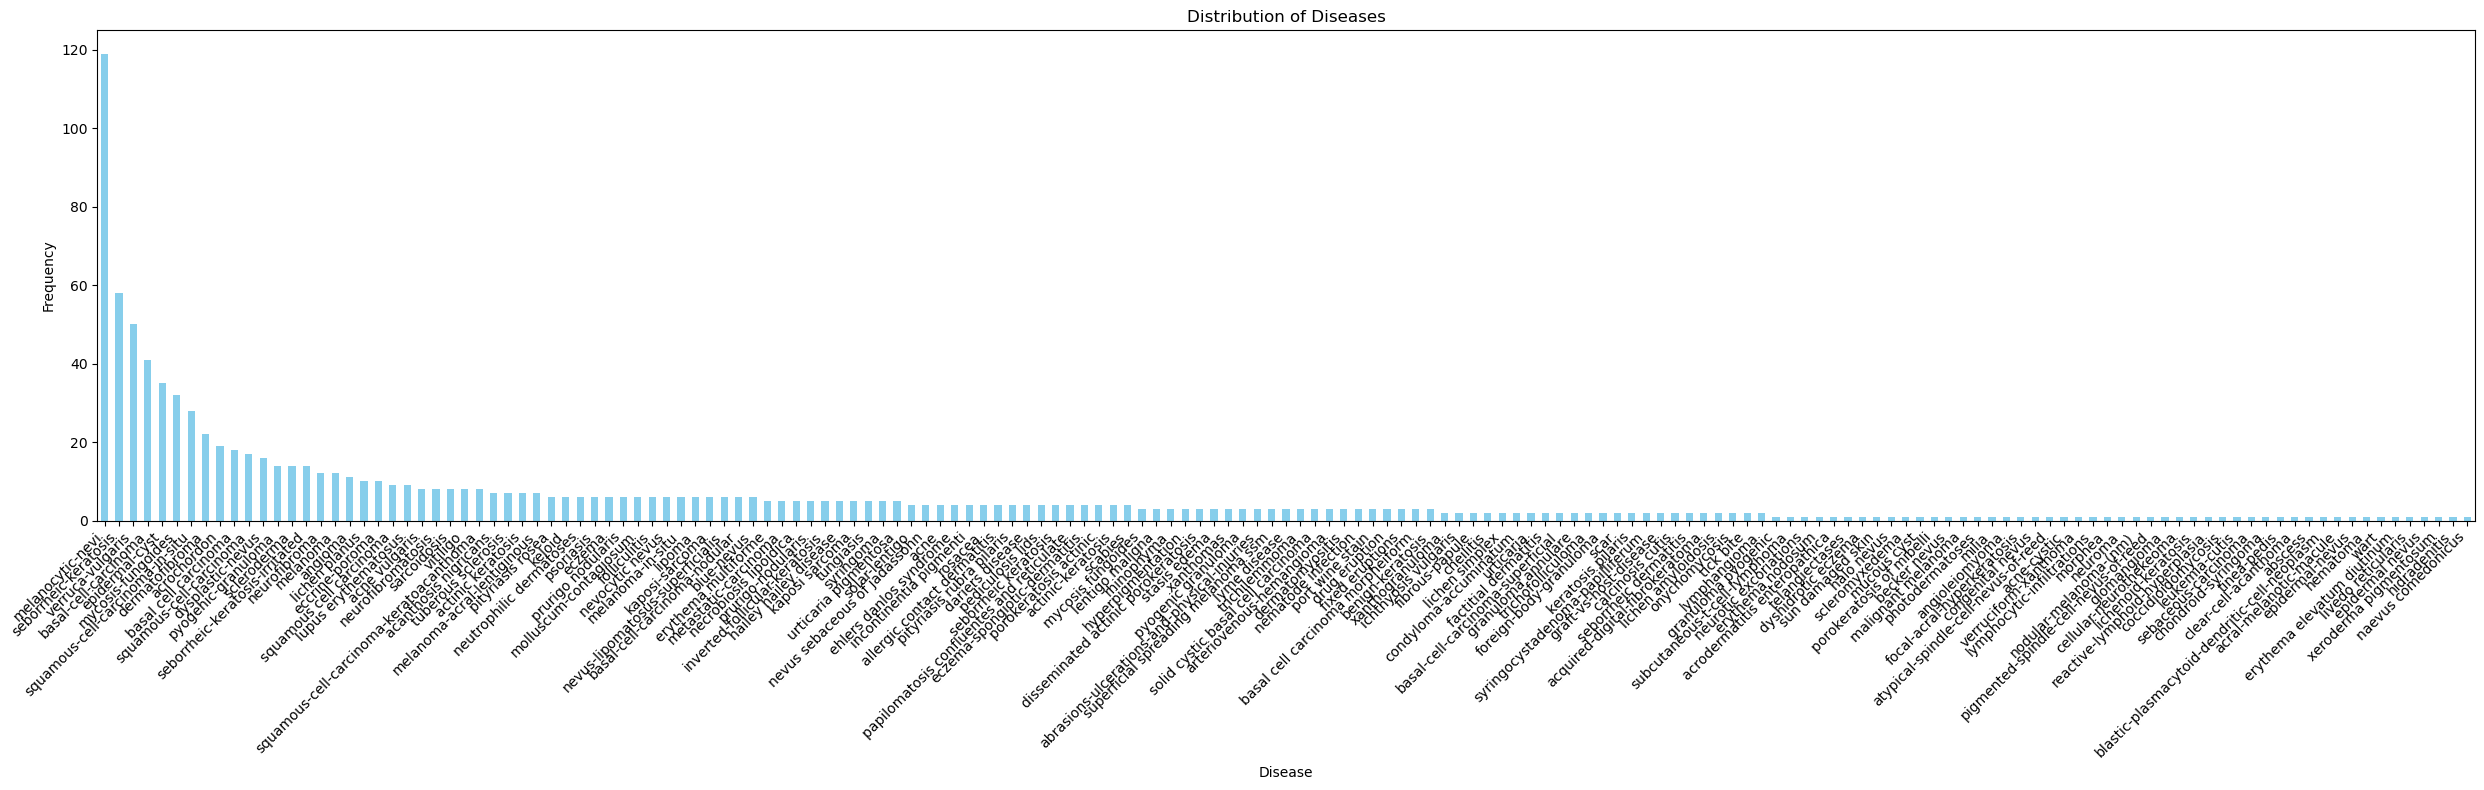

In [30]:
# Count the occurrences of each type of disease
disease_counts = df_merged['disease'].value_counts()

# Plotting
plt.figure(figsize=(25, 8))
disease_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45,  ha='right')

plt.tight_layout()
plt.show()

In [31]:
unique_diseases = df_merged['disease'].unique()
print("Unique diseases:", unique_diseases)

Unique diseases: ['melanoma-in-situ' 'mycosis-fungoides' 'squamous-cell-carcinoma-in-situ'
 'basal-cell-carcinoma' 'squamous-cell-carcinoma'
 'melanoma-acral-lentiginous' 'basal-cell-carcinoma-superficial'
 'squamous-cell-carcinoma-keratoacanthoma' 'subcutaneous-t-cell-lymphoma'
 'melanocytic-nevi' 'seborrheic-keratosis-irritated'
 'focal-acral-hyperkeratosis' 'hyperpigmentation' 'lipoma'
 'foreign-body-granuloma' 'blue-nevus' 'verruca-vulgaris' 'acrochordon'
 'wart' 'abrasions-ulcerations-and-physical-injuries'
 'basal-cell-carcinoma-nodular' 'epidermal-cyst'
 'acquired-digital-fibrokeratoma' 'epidermal-nevus' 'seborrheic-keratosis'
 'trichilemmoma' 'pyogenic-granuloma' 'neurofibroma'
 'syringocystadenoma-papilliferum' 'nevus-lipomatosus-superficialis'
 'benign-keratosis' 'inverted-follicular-keratosis' 'onychomycosis'
 'dermatofibroma' 'trichofolliculoma' 'lymphocytic-infiltrations'
 'prurigo-nodularis' 'kaposi-sarcoma' 'scar' 'eccrine-poroma'
 'angioleiomyoma' 'keloid' 'hematoma' 'm

In [32]:
disease_descriptions = {
    'melanoma-in-situ': 'A localized form of melanoma that remains confined to the top layer of the skin. It has not yet invaded deeper tissues and has a high cure rate when treated early.',
    'mycosis-fungoides': 'A type of cutaneous T-cell lymphoma that primarily affects the skin, presenting as patches or plaques that are often mistaken for eczema or psoriasis.',
    'squamous-cell-carcinoma-in-situ': "An early form of skin cancer that is confined to the outer layer of the skin and has not spread deeper. It appears as a red, scaly patch and can become invasive if left untreated.",
    'basal-cell-carcinoma': 'The most common type of skin cancer, characterized by slow growth and seldom spreading to other parts of the body. It usually appears as a slightly transparent bump on the sun-exposed skin.',
    'squamous-cell-carcinoma': 'A common form of skin cancer that arises from the squamous cells of the epidermis. It can be more aggressive than basal-cell carcinoma and may spread to other parts of the body if not treated early.',
    'melanoma-acral-lentiginous': 'A rare type of melanoma that usually occurs on the palms, soles, or under the nails and is more common in individuals with darker skin. It appears as a black or brown area and can be mistaken for a benign mole.',
    'basal-cell-carcinoma-superficial': 'A form of basal cell carcinoma that appears as a red, scaly, flat lesion on the skin, mostly occurring on the chest or back. It spreads superficially rather than penetrating deeper into the skin.',
    'squamous-cell-carcinoma-keratoacanthoma': 'A rapidly growing tumor that resembles squamous cell carcinoma but is typically considered less aggressive and may resolve on its own, though surgical removal is often recommended to prevent recurrence.',
    'subcutaneous-t-cell-lymphoma': 'A rare form of lymphoma that involves T-cell lymphocytes and primarily affects the skin, causing deep nodules that may not be visible on the skin surface.',
    'melanocytic-nevi': 'Benign accumulations of melanocytes that appear as small, dark brown spots on the skin and are usually harmless. They can vary in color and size and are typically round or oval with a smooth surface.',
    'seborrheic-keratosis-irritated': 'A benign skin growth that looks waxy or wart-like and may become irritated if rubbed or scratched, often appearing more inflamed or itchy during such times.',
    'focal-acral-hyperkeratosis': 'A rare skin condition characterized by thickened patches of skin, particularly on the hands and feet, often associated with significant skin hardening.',
    'hyperpigmentation': 'A common condition where patches of skin become darker in color than the normal surrounding skin, often due to excess melanin production.',
    'lipoma': 'A benign tumor made of fat tissue that feels soft and usually remains the same size over time. Typically not painful and moves easily under the skin.',
    'foreign-body-granuloma': 'An inflammatory lesion that forms as a reaction to a foreign object in the body, such as splinters, silica, sutures, or other implanted materials.',
    'blue-nevus': 'A benign, blue-colored spot on the skin, usually arising from the deeper layer of the dermis.',
    'verruca-vulgaris': 'A common viral infection caused by HPV that leads to rough, raised bumps on the skin.',
    'acrochordon': 'Small, benign, soft skin growths that often appear on the neck, armpits, upper trunk, and body folds.',
    'wart': 'A small growth with a rough texture caused by viruses in the human papillomavirus (HPV) family.',
    'abrasions-ulcerations-and-physical-injuries': 'Skin damage caused by scraping (abrasions), loss of skin layers (ulcerations), or other forms of direct physical injury.',
    'basal-cell-carcinoma-nodular': 'A common form of basal cell carcinoma that appears as a small, shiny, firm nodular lesion, often with visible blood vessels.',
    'epidermal-cyst': 'A small, round cyst typically found on the face, neck, or trunk, filled with keratin and presenting as a firm lesion under the skin.',
    'acquired-digital-fibrokeratoma': 'A benign growth commonly found on the fingers and toes, appearing as a small, firm nodule.',
    'epidermal-nevus': 'A non-cancerous overgrowth of the outer skin layer, appearing as a tan or brown patch, often present from birth.',
    'seborrheic-keratosis': 'A common benign skin growth that looks like a brown, black or light tan wart-like spot.',
    'trichilemmoma': 'A benign tumor related to hair follicles, typically appearing on the face.',
    'pyogenic-granuloma': 'A common benign growth that presents as a reddish, rapidly growing bump on the skin or inside the mouth.',
    'neurofibroma': 'A benign nerve sheath tumor that may develop anywhere in the nervous system.',
    'syringocystadenoma-papilliferum': 'A rare benign tumor that usually develops in the sweat glands.',
    'nevus-lipomatosus-superficialis': 'A rare benign condition characterized by the presence of mature adipocytes in the dermis.',
    'benign-keratosis': 'A broad term covering several types of benign skin growths involving thickened patches of epidermis.',
    'inverted-follicular-keratosis': 'A benign skin tumor that predominantly occurs on the face.',
    'onychomycosis': 'A fungal infection of the nails causing discoloration, thickening, and separation from the nail bed.',
    'dermatofibroma': 'A common benign skin lesion noted for its firm fibrous bump on the lower legs.',
    'trichofolliculoma': 'A benign tumor typically presenting as a single small lesion with a central pore filled with white material.',
    'lymphocytic-infiltrations': 'Benign infiltrates of lymphocytes in the skin, often presenting as localized areas of swelling.',
    'prurigo-nodularis': 'A skin condition featuring itchy, firm bumps on the skin.',
    'kaposi-sarcoma': 'A type of cancer that forms in the lining of blood and lymph vessels.',
    'scar': 'Fibrous tissue that replaces normal skin after an injury.',
    'eccrine-poroma': 'A benign tumor that derives from the sweat glands.',
    'angioleiomyoma': 'A benign smooth muscle tumor that originates from the walls of blood vessels.',
    'keloid': 'A raised scar that grows excessively where the skin has healed after an injury.',
    'hematoma': 'A collection of blood outside of blood vessels, usually in liquid form within the tissue.',
    'metastatic-carcinoma': 'Cancer that has spread from the place where it first started to another place in the body.',
    'melanoma': 'A serious form of skin cancer that arises from pigment-containing cells known as melanocytes.',
    'angioma': 'A benign tumor derived from blood vessels or lymphatic vessels, typically appearing as a red to purple growth on the skin.',
    'folliculitis': 'Inflammation of hair follicles, often resulting in red, itchy bumps, caused by infection or irritation.',
    'atypical-spindle-cell-nevus-of-reed': 'A rare type of mole with atypical features under the microscope, often resembling melanoma but generally benign.',
    'xanthogranuloma': 'A benign condition characterized by yellowish nodules on the skin, primarily affecting infants and young children.',
    'eczema-spongiotic-dermatitis': 'A form of eczema that involves fluid buildup in the epidermis, leading to itchy, swollen skin areas.',
    'arteriovenous-hemangioma': 'A vascular lesion formed by an abnormal connection between arteries and veins, appearing as a red, blue, or purple spot.',
    'acne-cystic': 'A severe form of acne that occurs when cysts form deep under the skin, leading to painful, inflamed lesions.',
    'verruciform-xanthoma': 'A rare benign lesion characterized by wart-like growths, typically appearing in the oral mucosa but can occur on the skin.',
    'molluscum-contagiosum': 'A viral infection causing round, firm, painless bumps on the skin, highly contagious among children.',
    'condyloma-accuminatum': 'Genital warts caused by human papillomavirus (HPV), presenting as small, flesh-colored or gray growths in the genital area.',
    'morphea': 'A localized form of scleroderma, leading to patches of hardened and discolored skin.',
    'neuroma': 'A painful condition typically occurring in the foot, involving a benign growth of nerve tissue often between the toes.',
    'dysplastic-nevus': 'An atypical mole that may resemble melanoma and has a higher risk of developing into skin cancer.',
    'nodular-melanoma-(nm)': 'A type of melanoma that presents as a new, usually dark-colored bump that rises above the skin’s surface.',
    'actinic-keratosis': 'A rough, scaly patch on the skin caused by years of sun exposure, potentially developing into skin cancer.',
    'pigmented-spindle-cell-nevus-of-reed': 'A variant of a benign mole that typically appears as a dark, flat or slightly raised lesion, usually found on the trunk or limbs.',
    'dermatomyositis': 'An inflammatory disease marked by muscle weakness and a distinctive skin rash.',
    'glomangioma': 'A rare vascular tumor derived from the glomus body, typically painful and located under the nails, on fingertips, or toes.',
    'cellular-neurothekeoma': 'A benign tumor affecting nerve sheaths, usually appearing as a small, firm nodule on the face, arms, or upper body.',
    'fibrous-papule': 'A common benign lesion, often a small, firm bump found on the nose.',
    'graft-vs-host-disease': 'A complication of bone marrow transplant involving the donor cells attacking the recipient\'s body tissues.',
    'lichenoid-keratosis': 'A benign skin lesion that resembles lichen planus, typically appearing as a solitary, scaly patch.',
    'reactive-lymphoid-hyperplasia': 'A benign increase in the number of lymphocytes, typically in response to infection or inflammation.',
    'coccidioidomycosis': 'A fungal infection caused by inhaling the spores of Coccidioides fungi, known as "valley fever."',
    'leukemia-cutis': 'The infiltration of leukemia cells in the skin, causing lesions or bumps that may be red, purple, or blue.',
    'sebaceous-carcinoma': 'A rare and aggressive form of skin cancer that originates in the sebaceous glands.',
    'chondroid-syringoma': 'A rare benign tumor that arises from sweat glands, typically found in the deep layers of the skin, usually on the face, scalp, or feet.',
    'tinea-pedis': "A fungal infection of the foot characterized by itching, scaling, and redness, particularly between the toes.",
    'solar-lentigo': 'A common skin condition characterized by small, flat, brown sun spots that typically occur on sun-exposed areas of the skin.',
    'clear-cell-acanthoma': 'A rare benign skin lesion that appears as a well-demarcated, reddish plaque, often on the lower legs.',
    'abscess': 'A collection of pus that has built up within the tissue of the body as a result of an infection.',
    'blastic-plasmacytoid-dendritic-cell-neoplasm': 'A rare type of aggressive blood cancer that presents with skin lesions and involves plasmacytoid dendritic cells.',
    'acral-melanotic-macule': 'A dark spot found on the palms, soles, or around the nails, usually benign and non-cancerous.',
    'acne-vulgaris': 'A common skin condition that occurs when hair follicles become clogged with oil and dead skin cells, leading to whiteheads, blackheads, or pimples.',
    'eczema': 'A condition that makes the skin red and itchy. Common in children but can occur at any age.',
    'basal-cell-carcinoma-morpheiform': 'A less common form of basal cell skin cancer, known for its scar-like appearance, often more aggressive.',
    'allergic-contact-dermatitis': 'A skin reaction that occurs when the skin comes into contact with a substance that the immune system recognizes as foreign.',
    'neurofibromatosis': 'A genetic disorder that causes tumors to form on nerve tissue. These tumors are usually benign and are called neurofibromas.',
    'basal-cell-carcinoma': 'The most common form of skin cancer that rarely metastasizes but can cause significant local destruction.',
    'neutrophilic-dermatoses': 'A group of disorders characterized by the accumulation of neutrophils in the skin, leading to various lesions and rashes.',
    'keratosis-pilaris': 'A common skin condition that causes rough patches and small, acne-like bumps, typically on the arms, thighs, cheeks, and buttocks.',
    'scleroderma': 'A group of autoimmune diseases that cause the skin and connective tissues to harden and tighten.',
    'pityriasis-rosea': 'A skin rash that typically begins as a large circular or oval spot on the chest, abdomen, or back, followed by similar but smaller patches.',
    'acanthosis-nigricans': 'A skin condition characterized by areas of dark, velvety discoloration in body folds and creases.',
    'erythema-multiforme': 'An acute skin condition involving red patches and blisters that look like targets, often related to infections or medications.',
    'nevocytic-nevus': 'A common type of mole made up of nevus cells, which are a type of melanocyte.',
    'lichen-amyloidosis': 'A chronic form of skin amyloidosis presenting as itchy, raised spots typically on the lower legs.',
    'hailey-hailey-disease': 'A rare genetic disorder that causes blisters and erosions on the skin, particularly in areas of friction.',
    'rosacea': 'A chronic skin condition that causes redness and visible blood vessels in your face. It may also produce small, red, pus-filled bumps.',
    'nevus sebaceous of jadassohn': 'A congenital skin lesion that appears as a yellow-orange plaque, often located on the scalp or face, which can develop secondary tumors.',
    'ehlers danlos syndrome': 'A group of disorders affecting the connective tissues, characterized by highly flexible joints, stretchy skin, and fragile tissues.',
    'acne': 'A skin condition that occurs when hair follicles become clogged with oil and dead skin cells, leading to whiteheads, blackheads, or pimples.',
    'tungiasis': 'An infestation caused by the Tunga penetrans flea, leading to severe inflammation, itching, and pain.',
    'xanthomas': 'Fatty growths under the skin that can appear anywhere on the body, often indicative of high cholesterol levels.',
    'lymphangioma': 'A benign tumor made up of lymph vessels, typically appearing as a soft, cystic mass.',
    'pyogenic granuloma': 'A rapid-growing, benign vascular tumor of the skin or mucous membranes, often appearing as a red, moist bump.',
    'kaposi sarcoma': 'A type of cancer that forms in the lining of blood and lymph vessels, often appearing as purple, red, or brown blotches or tumors on the skin or in the mouth.',
    'lupus erythematosus': 'An autoimmune disease that causes widespread inflammation and tissue damage in affected organs, including the skin.',
    'dariers disease': 'A genetic skin disorder resulting in thick, hard patches on the skin, particularly in oily areas.',
    'superficial spreading melanoma ssm': 'The most common type of melanoma, which spreads superficially before penetrating more deeply.',
    'pityriasis rubra pilaris': 'A rare skin disorder that causes constant inflammation and scaling of the skin, often covering large areas.',
    'mycosis fungoides': 'A type of cutaneous T-cell lymphoma that primarily affects the skin, presenting as patches, plaques, or tumors.',
    'squamous cell carcinoma': 'A common form of skin cancer arising from the squamous cells of the epidermis, potentially aggressive.',
    'scabies': 'An infestation of the skin by the human itch mite, causing intense itching and a pimple-like rash.',
    'lyme disease': 'A tick-borne illness caused by the bacterium Borrelia burgdorferi, characterized by fever, headache, fatigue, and a characteristic skin rash.',
    'papilomatosis confluentes and reticulate': 'A rare, chronic skin condition presenting with confluent and reticulated papillomatous lesions.',
    'stasis edema': 'Swelling in the legs caused by fluid buildup, often due to underlying health conditions affecting circulation.',
    'tuberous sclerosis': 'A genetic disorder that causes non-cancerous tumors to grow in the brain and other vital organs.',
    'erythema elevatum diutinum': 'A rare chronic inflammatory condition that causes raised, red, purple, or brown lesions that can become firmer over time.',
    'psoriasis': 'A chronic autoimmune condition that results in the buildup of skin cells, forming scales and itchy, dry patches.',
    'sarcoidosis': 'An inflammatory disease that affects multiple organs, particularly the lungs and lymph glands, characterized by the formation of granulomas.',
    'urticaria pigmentosa': 'A form of mastocytosis involving the presence of too many mast cells in the skin, leading to hives or itchy spots.',
    'livedo reticularis': 'A vascular condition that causes a mottled reddish-blue skin discoloration in a netlike pattern.',
    'vitiligo': 'A condition where the skin loses melanin, the pigment that determines the color of skin, hair, and eyes, resulting in discolored patches.',
    'epidermal nevus': 'Non-cancerous overgrowths of the epidermis, appearing as raised, often rough skin patches that may be present from birth.',
    'xeroderma pigmentosum': 'A genetic disorder causing extreme sensitivity to sunlight and a high risk of skin cancer due to an inability to repair DNA damage from UV light.',
    'disseminated actinic porokeratosis': 'A condition characterized by numerous dry, scaly spots that are precancerous, resulting from sun exposure.',
    'lentigo maligna': 'A type of melanoma that occurs as a slow-growing dark patch on sun-exposed skin, particularly the face.',
    'ichthyosis vulgaris': 'A genetic skin disorder causing dry, scaly skin due to excessive keratin production.',
    'rhinophyma': 'A condition characterized by a large, red, bumpy nose due to chronic inflammation, often associated with severe rosacea.',
    'seborrheic keratosis': 'Benign skin growths that appear as brown, black, or light tan warts.',
    'cheilitis': 'Inflammation of the lips, often manifesting as redness, dryness, and cracking.',
    'hidradenitis': 'A chronic skin condition featuring lumps under the skin that can become inflamed and painful, often occurring in the armpits or groin.',
    'granuloma annulare': 'A benign condition manifesting as ring-shaped, smooth, firm bumps on the skin.',
    'congenital nevus': 'A mole present at birth, varying greatly in size and shape, potentially increasing the risk of melanoma.',
    'actinic keratosis': 'Rough, scaly patches on sun-exposed skin, considered precancerous.',
    'solid cystic basal cell carcinoma': 'A form of basal cell skin cancer featuring solid and cystic components, often more aggressive.',
    'granuloma pyogenic': 'A growth of the skin resulting from rapid proliferation of blood vessels, producing a red, bump-like lesion.',
    'necrobiosis lipoidica': 'A rare skin disorder causing raised, shiny, reddish-brown patches typically on the shins.',
    'prurigo nodularis': 'A skin disease characterized by itchy nodules which can be triggered by a scratch or any skin trauma.',
    'neurotic excoriations': 'Skin lesions often induced by scratching or picking, typically driven by psychological factors.',
    'syringoma': 'Benign tumors of the sweat ducts, usually found around the eyelids.',
    'urticaria': 'Red, itchy welts that result from a skin reaction.',
    'lichen planus': 'An inflammatory skin condition presenting as purple, itchy, flat bumps on the skin and inside the mouth.',
    'porokeratosis of mibelli': 'A rare skin disorder characterized by abnormal keratinization leading to scaly lesions.',
    'incontinentia pigmenti': 'A genetic condition that causes blisters, abnormal skin coloration, and possible dental and hair abnormalities.',
    'scleromyxedema': 'A rare, severe skin condition involving thickening and hardening of the skin with mucin deposition.',
    'seborrheic dermatitis': 'A skin condition causing flaky, white to yellowish scales to form on oily areas such as the scalp or inside the ear.',
    'drug eruption': 'An adverse skin reaction to a drug, manifesting as a widespread rash, blisters, or other skin changes.',
    'tick bite': 'The act of a tick biting the skin, which can transmit diseases like Lyme disease.',
    'fixed eruptions': 'A reaction to a medication causing localized skin redness, swelling, and sometimes blistering at the same site each time the drug is taken.',
    'port wine stain': 'A birthmark in which swollen blood vessels cause a reddish-purplish discoloration of the skin.',
    'calcinosis cutis': 'A condition where calcium deposits form in the skin, often in association with underlying diseases.',
    'acrodermatitis enteropathica': 'A rare genetic disorder affecting zinc uptake, leading to severe dermatitis, alopecia, and diarrhea.',
    'dyshidrotic eczema': 'A skin condition characterized by small, itchy blisters on the edges of the fingers, toes, palms, and soles of the feet.',
    'sun damaged skin': 'Skin changes due to prolonged exposure to the sun, including dryness, wrinkling, and increased risk of skin cancer.',
    'halo nevus': 'A mole with a white ring, or halo, around it. The halo results from the skin losing its color around the mole.',
    'mucous cyst': 'A fluid-filled swelling that occurs on the lip or the mouth that is often associated with lip biting.',
    'photodermatoses': 'A group of conditions caused or exacerbated by exposure to sunlight.',
    'milia': 'Tiny white bumps that commonly appear on a baby\'s face, representing small cysts.',
    'telangiectases': 'Small, widened blood vessels on the skin, usually harmless.',
    'malignant melanoma': 'A serious form of skin cancer that originates from the pigment-producing melanocytes in the skin.',
    'becker nevus': 'A benign, large, brown birthmark occurring predominantly in males, often associated with hair growth.',
    'nematode infection': 'An infection caused by nematode worms, which can affect the skin, intestines, and other organs.',
    'factitial dermatitis': 'A condition where skin lesions are self-inflicted, typically as a result of psychological compulsion.',
    'lichen simplex': 'Thickened patches of skin caused by repeated rubbing, itching, or scratching.',
    'erythema nodosum': 'An inflammatory condition characterized by tender red nodules or lumps that usually appear on the shins.',
    'porokeratosis actinic': 'A type of porokeratosis associated with sun exposure, leading to scaly lesions.',
    'pediculosis lids': 'Infestation of lice on the eyelashes, causing itching and redness around the eyes.',
    'naevus comedonicus': 'A rare type of epidermal nevus that presents as groups of closely set, dilated follicular openings with dark keratin plugs resembling blackheads.'
    # Add more diseases and their descriptions here...
}

In [33]:
# Apply the updated descriptions to the DataFrame
df_merged['disease_description'] = df_merged['disease'].map(disease_descriptions)
df_merged['disease_description'].fillna('Description not available', inplace=True)

In [34]:
df_merged.head()

,filename,skin_tone,malignant,disease,diagnostic_type,disease_description
0,000001.png,56,True,melanoma-in-situ,Diagnostic,A localized form of melanoma that remains conf...
1,000002.png,56,True,melanoma-in-situ,Diagnostic,A localized form of melanoma that remains conf...
2,000003.png,56,True,mycosis-fungoides,Diagnostic,A type of cutaneous T-cell lymphoma that prima...
3,000004.png,56,True,squamous-cell-carcinoma-in-situ,Diagnostic,An early form of skin cancer that is confined ...
4,000005.png,12,True,basal-cell-carcinoma,Diagnostic,The most common form of skin cancer that rarel...


<Figure size 1000x600 with 0 Axes>

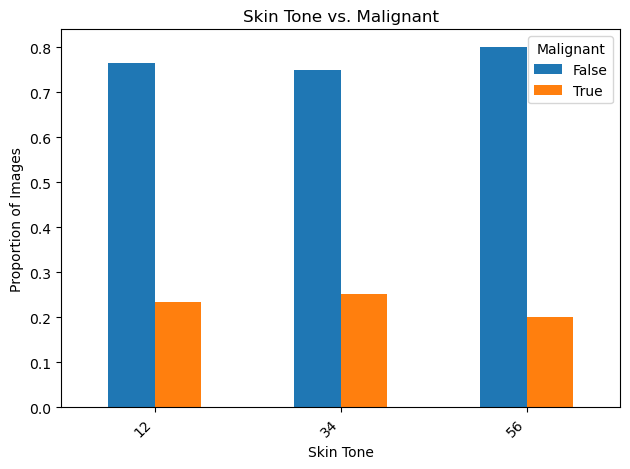

In [35]:
# Group the data by marital status and purchase, and calculate the percentages
skintone_malignant_counts = df_merged.groupby(['skin_tone', 'malignant']).size().unstack(fill_value=0)
skintone_malignant_percentages = skintone_malignant_counts.div(skintone_malignant_counts.sum(axis=1), axis=0) * 1

plt.figure(figsize=(10, 6))
skintone_malignant_percentages.plot(kind='bar', stacked=False)
plt.title('Skin Tone vs. Malignant')
plt.xlabel('Skin Tone')
plt.ylabel('Proportion of Images')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Malignant', labels=['False', 'True'])
plt.tight_layout()
plt.show()

### Export combined metadata file

In [36]:
# Export the DataFrame to a CSV file
df_merged.to_csv('combined_data_disease_descriptions.csv', index=True)

#### Skin_tone model 12 -  ( Types 1 & Type 2 )

In [37]:
df_skin_tone_12 = pd.DataFrame()
df_skin_tone_12 = df_merged[df_merged['skin_tone'] == 12 ]
df_skin_tone_12.to_csv('skin_tone_12.csv', index=True)
df_skin_tone_12

,filename,skin_tone,malignant,disease,diagnostic_type,disease_description
4,000005.png,12,True,basal-cell-carcinoma,Diagnostic,The most common form of skin cancer that rarel...
36,000037.png,12,True,basal-cell-carcinoma,Diagnostic,The most common form of skin cancer that rarel...
37,000038.png,12,True,squamous-cell-carcinoma-keratoacanthoma,Diagnostic,A rapidly growing tumor that resembles squamou...
38,000039.png,12,True,squamous-cell-carcinoma,Diagnostic,A common form of skin cancer that arises from ...
39,000040.png,12,True,squamous-cell-carcinoma-in-situ,Diagnostic,An early form of skin cancer that is confined ...
...,...,...,...,...,...,...
15536,518264d189db5695195a516892b7a3f0.jpg,12,True,basal cell carcinoma,Diagnostic,Description not available
16010,67c9271813f07f5311e2cb435a817403.jpg,12,True,basal cell carcinoma,Diagnostic,Description not available
16311,1ab04144c59873b97ebd997839bf3960.jpg,12,True,mycosis fungoides,Diagnostic,A type of cutaneous T-cell lymphoma that prima...
16408,a127db0a5ff8c040a406230386a58ac4.jpg,12,False,neutrophilic dermatoses,Diagnostic,Description not available


#### Skin_tone model 34 - ( Types 3 & Type 4 )

In [38]:
df_skin_tone_34 = pd.DataFrame()
df_skin_tone_34 = df_merged[df_merged['skin_tone'] == 34 ]
df_skin_tone_34.to_csv('skin_tone_34.csv', index=True)
df_skin_tone_34

,filename,skin_tone,malignant,disease,diagnostic_type,disease_description
9,000010.png,34,True,basal-cell-carcinoma-superficial,Diagnostic,A form of basal cell carcinoma that appears as...
35,000036.png,34,False,melanocytic-nevi,Diagnostic,Benign accumulations of melanocytes that appea...
56,000057.png,34,False,foreign-body-granuloma,Diagnostic,An inflammatory lesion that forms as a reactio...
61,000062.png,34,False,seborrheic-keratosis-irritated,Diagnostic,A benign skin growth that looks waxy or wart-l...
63,000064.png,34,False,melanocytic-nevi,Diagnostic,Benign accumulations of melanocytes that appea...
...,...,...,...,...,...,...
16987,14c1d65a2ad46d5efc6ad714224483ee.jpg,34,True,squamous cell carcinoma,Diagnostic,A common form of skin cancer arising from the ...
17020,5e14cb4533baceee678c6b667706c41c.jpg,34,False,pityriasis rubra pilaris,Diagnostic,A rare skin disorder that causes constant infl...
17042,fe1b233e940594302c83ac065ba81753.jpg,34,False,urticaria pigmentosa,Diagnostic,A form of mastocytosis involving the presence ...
17081,e2d0f7a666d346a7f149185b23a42483.jpg,34,True,basal cell carcinoma,Diagnostic,Description not available


#### Skin_tone model 56 - ( Types 5 & Type 6 )

In [39]:
df_skin_tone_56 = pd.DataFrame()
df_skin_tone_56 = df_merged[df_merged['skin_tone'] == 56 ]
df_skin_tone_56.to_csv('skin_tone_56.csv', index=True)
df_skin_tone_56

,filename,skin_tone,malignant,disease,diagnostic_type,disease_description
0,000001.png,56,True,melanoma-in-situ,Diagnostic,A localized form of melanoma that remains conf...
1,000002.png,56,True,melanoma-in-situ,Diagnostic,A localized form of melanoma that remains conf...
2,000003.png,56,True,mycosis-fungoides,Diagnostic,A type of cutaneous T-cell lymphoma that prima...
3,000004.png,56,True,squamous-cell-carcinoma-in-situ,Diagnostic,An early form of skin cancer that is confined ...
5,000006.png,56,True,squamous-cell-carcinoma,Diagnostic,A common form of skin cancer that arises from ...
...,...,...,...,...,...,...
16158,f3c89dc53032f4abdadce712829206fd.jpg,56,False,lichen planus,Diagnostic,An inflammatory skin condition presenting as p...
16160,4fcc99459367a1e390c188e5f40fbfe7.jpg,56,False,vitiligo,Diagnostic,"A condition where the skin loses melanin, the ..."
16173,267518e9fd4adadae0b28dd8edb0d328.jpg,56,False,scleroderma,Diagnostic,A group of autoimmune diseases that cause the ...
16365,aa66ef79c68444921757269741825c39.jpg,56,False,lichen planus,Diagnostic,An inflammatory skin condition presenting as p...


The images from both DDI and Fitzpatrick have been stored in a combined folder "merged_data".